# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [21]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading data
dfh = pd.read_csv('train.csv')
dfh.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
#Meta
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
#Description
dfh.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a1040f0>,
      dtype=object)

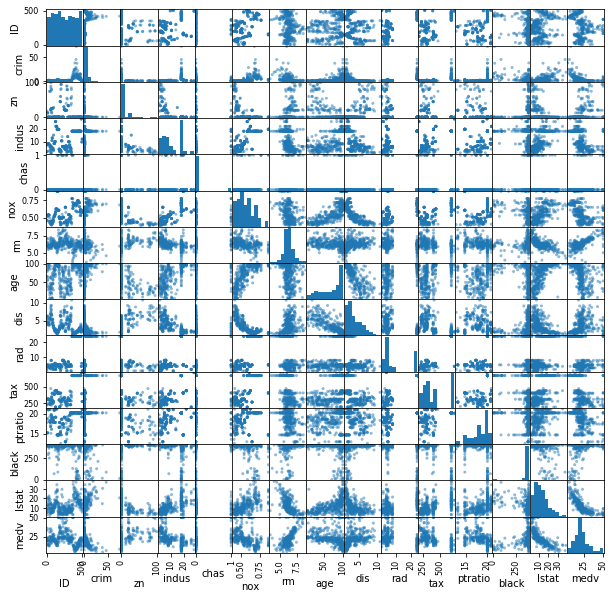

In [5]:
pd.plotting.scatter_matrix(dfh, figsize=(10,10))

In [6]:
#In Depth Descriptions
#Age median
age_med = dfh.age.median()
print('Age median:', age_med)
# Crime mean
crim_mean = dfh.crim.mean()
print('Crime mean:', crim_mean)
tax_max = dfh.tax.max()
print('Tax max:', tax_max)

Age median: 76.7
Crime mean: 3.360341471471471
Tax max: 711


Now, we am going to split the data set between those records on the Charles River and those not on the river.

In [7]:
#Split 1, bound to charles river
# Near the Charles River
dfh_cr = dfh.loc[dfh['chas'] == 1]
print(dfh_cr.head())
print(dfh_cr.shape)

# Away from the Charles River
dfh_no_cr = dfh.loc[dfh['chas'] == 0]
print(dfh_no_cr.head())
print(dfh_no_cr.shape)

      ID     crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
97   143  3.32105  0.0  19.58     1  0.871  5.403  100.0  1.3216    5  403   
104  155  1.41385  0.0  19.58     1  0.871  6.129   96.0  1.7494    5  403   
108  161  1.27346  0.0  19.58     1  0.605  6.250   92.6  1.7984    5  403   
110  164  1.51902  0.0  19.58     1  0.605  8.375   93.9  2.1620    5  403   
145  209  0.13587  0.0  10.59     1  0.489  6.064   59.1  4.2392    4  277   

     ptratio   black  lstat  medv  
97      14.7  396.90  26.82  13.4  
104     14.7  321.02  15.12  17.0  
108     14.7  338.92   5.50  27.0  
110     14.7  388.45   3.32  50.0  
145     18.6  381.32  14.66  24.4  
(20, 15)
   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5 

We then made boxplots for the two data sets and saw that median Home values on Charles River had a median value around 25 whereas non-Charles River Home Values were closer to 20. 

Text(0.5, 1.0, 'Non- Charles River Home Values')

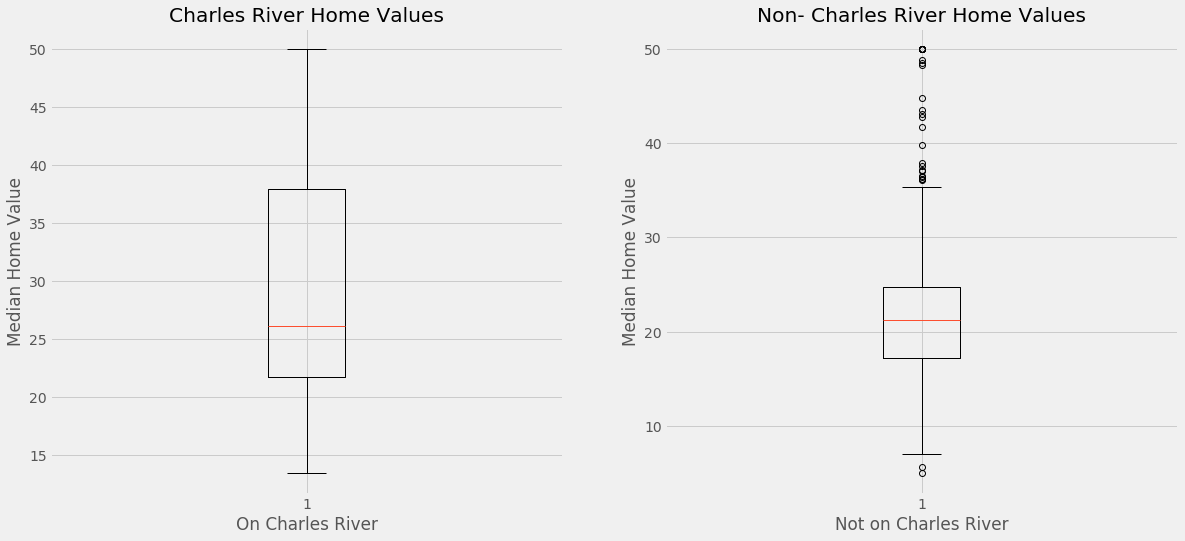

In [36]:
#Boxplots for Charles River/No Charles River AND median home values
# Viz 1 for Charles River Comparison:
fig1 = plt.figure(figsize=(18,8)) #Setting Overall Plot
ax1 = fig1.add_subplot(121) # Setting subplot 1 
ax2 = fig1.add_subplot(122) # Setting subplot 2
plt.style.use('fivethirtyeight')

# Boxplot for Home Values on Charles River
ax1.boxplot(dfh_cr['medv'])
ax1.set_xlabel('On Charles River')
ax1.set_ylabel('Median Home Value')
ax1.set_title('Charles River Home Values')


# Boxplot for Home values not on Charles River
ax2.boxplot(dfh_no_cr['medv'])
ax2.set_xlabel('Not on Charles River')
ax2.set_ylabel('Median Home Value')
ax2.set_title('Non- Charles River Home Values')

After doing this boxplot, we notice a potential difference between Charles River-side homes and those that are not on the river. Now, we want look a little deeper into potential scatter and histogram plots that could shed some further insight. First, we will take another look at the distribution of median home values via a histogram.

Text(0, 0.5, 'Number of Houses')

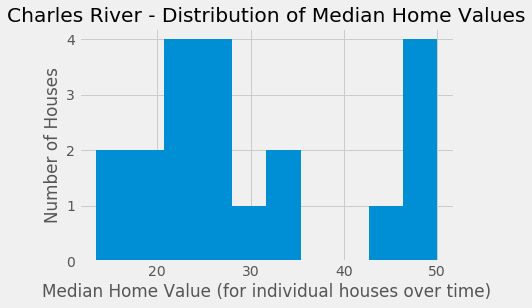

In [55]:
# Histogram plot for Charles River Median Values:
dfh_cr['medv'].hist()
plt.title('Charles River - Distribution of Median Home Values')
plt.xlabel('Median Home Value (for individual houses over time)')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'Number of Houses')

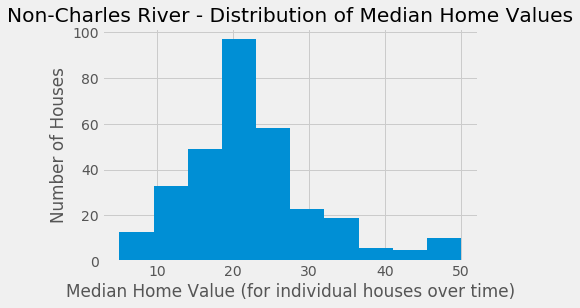

In [56]:
# Histogram plot for Charles River Median Values:
dfh_no_cr['medv'].hist()
plt.title('Non-Charles River - Distribution of Median Home Values')
plt.xlabel('Median Home Value (for individual houses over time)')
plt.ylabel('Number of Houses')

After seeing a similar picture of distribution regarding median home values around and not around Charles River, we decided to see if the two data sets had a similiar relationship with one another pertaining to crime. As with the previous histograms, these showed a fairly normal distribution and and corresponded quite closely to their boxplots as expected. Now we look at a scatter plot between Number of Rooms and median values. We chose this variable for its high positive correlation with value in an effort to see any differences that occur between the data set of Charles River and that of the Non-Charles River properties.

Text(0.5, 1.0, 'Charles River Home Values With Crime Rates')

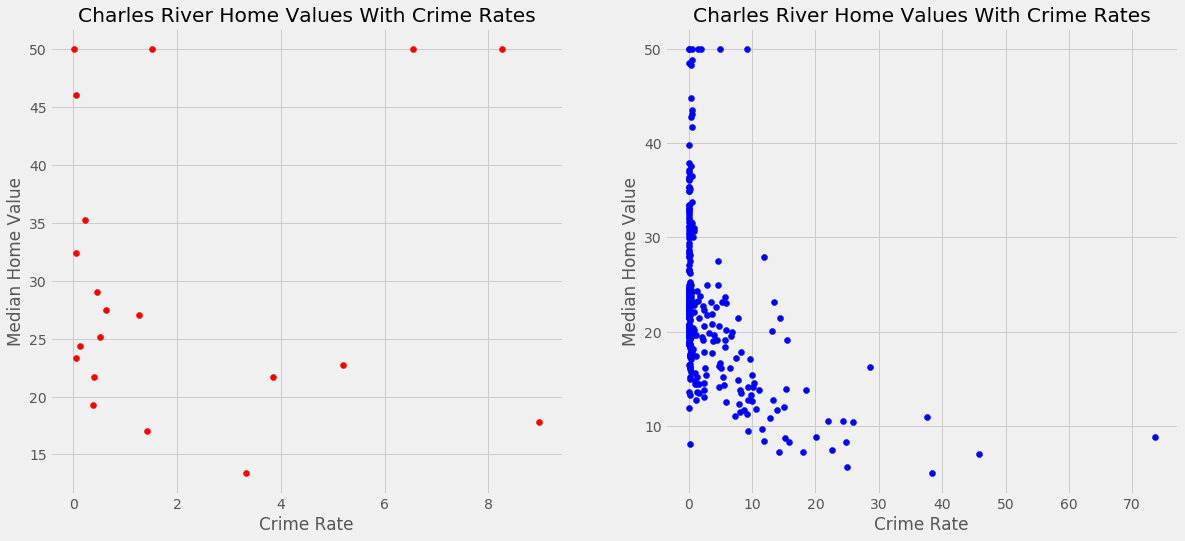

In [37]:
# Scatter plosts for Charles River and Non-Charles River:
# Viz 1 for Charles River Comparison:
fig1 = plt.figure(figsize=(18,8)) #Setting Overall Plot
ax1 = fig1.add_subplot(121) # Setting subplot 1 
ax2 = fig1.add_subplot(122) # Setting subplot 2

# Drawing Scatter 
ax1.scatter(dfh_cr['crim'], dfh_cr['medv'], color='red', marker='o')
ax1.set_xlabel('Crime Rate')
ax1.set_ylabel('Median Home Value')
ax1.set_title('Charles River Home Values With Crime Rates')

# Drawing Scatter
ax2.scatter(dfh_no_cr['crim'], dfh_no_cr['medv'], color='blue', marker='o')
ax2.set_xlabel('Crime Rate')
ax2.set_ylabel('Median Home Value')
ax2.set_title('Charles River Home Values With Crime Rates')

Both homes around and not around Charles River seem to have higher values that corrospond with lower crime rates. This is not surprising.

Now we made two data sets from the original, one with a crime rate below 5 percent and one with a crime rate higher than 5 percent. Below 5 percent was designated as "low" due to its much lower instance in comparison to "high". Perhaps an F-test could have been employed here to get a better idea of "high" and "low" rates.

In [38]:
#Split 2, Crime Rate < .05
# Near the Charles River
dfh_lcr = dfh.loc[dfh['crim'] < .05]
print(dfh_lcr.head())
print(dfh_lcr.shape)

# Crime Rate > .05
dfh_hcr = dfh.loc[dfh['crim'] > .05]
print(dfh_hcr.head())
print(dfh_hcr.shape)

    ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
22  40  0.02763  75.0   2.95     0  0.428  6.595  21.8  5.4011    3  252   
23  41  0.03359  75.0   2.95     0  0.428  7.024  15.8  5.4011    3  252   

    ptratio   black  lstat  medv  
0      15.3  396.90   4.98  24.0  
1      17.8  396.90   9.14  21.6  
2      18.7  394.63   2.94  33.4  
22     18.3  395.63   4.32  30.8  
23     18.3  395.62   1.98  34.9  
(50, 15)
   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
5  11  0.22489  12.5   7.87     0  0.524  6.377  94.3  6.3467    5  311   
6  12  0.11747  12.5   7

Text(0.5, 1.0, 'High Crime Rate Median Home Value')

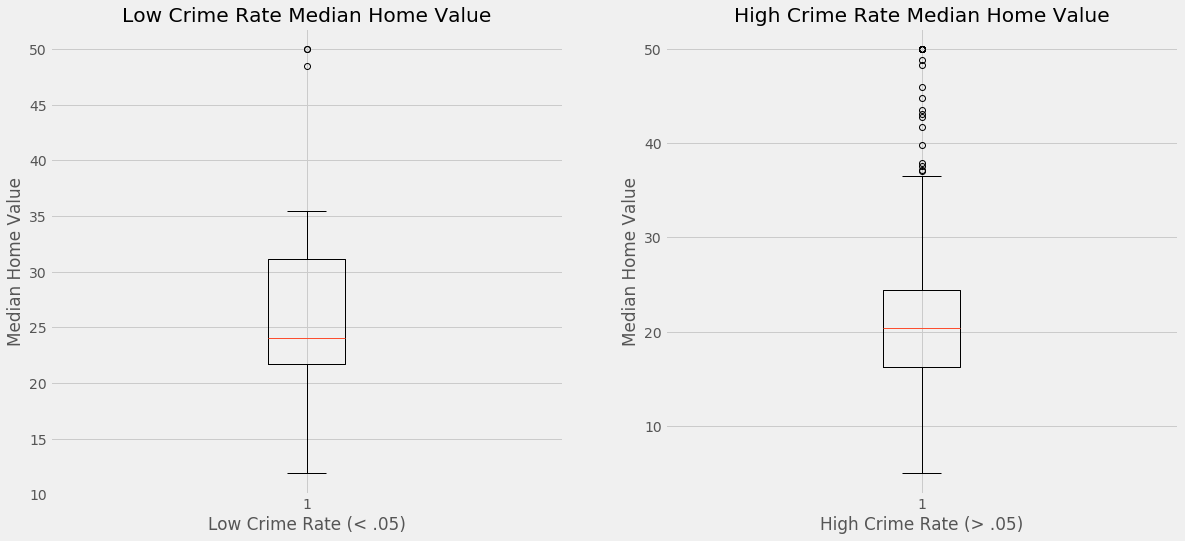

In [39]:
#Boxplots for Low Crime Rate/High Crime Rate AND median home values
fig2 = plt.figure(figsize=(18,8)) #Setting Overall Plot
ax3 = fig2.add_subplot(121) # Setting subplot 1 
ax4 = fig2.add_subplot(122) # Setting subplot 2

# Boxplot for Home Values on Low Crime Rate (< .05)
ax3.boxplot(dfh_lcr['medv'])
ax3.set_xlabel('Low Crime Rate (< .05)')
ax3.set_ylabel('Median Home Value')
ax3.set_title('Low Crime Rate Median Home Value')


# Boxplot for Home values on High Crime Rate (>.5)
ax4.boxplot(dfh_hcr['medv'])
ax4.set_xlabel('High Crime Rate (> .05)')
ax4.set_ylabel('Median Home Value')
ax4.set_title('High Crime Rate Median Home Value')

After doing this boxplot, we notice a potential difference between Low Crime Rate homes and those of high rates. Now, we want look a little deeaper into potential scatter and histogram plots that could shed some further insight.

Text(0, 0.5, 'Number of Houses')

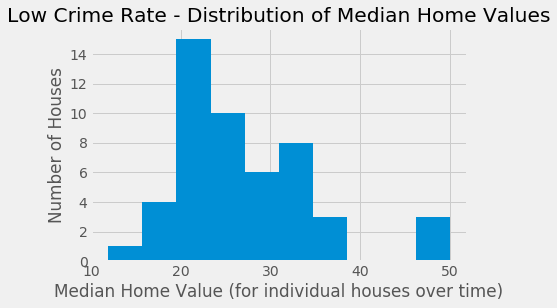

In [57]:
# Histogram plot for Charles River Median Values:
dfh_lcr['medv'].hist()
plt.title('Low Crime Rate - Distribution of Median Home Values')
plt.xlabel('Median Home Value (for individual houses over time)')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'Number of Houses')

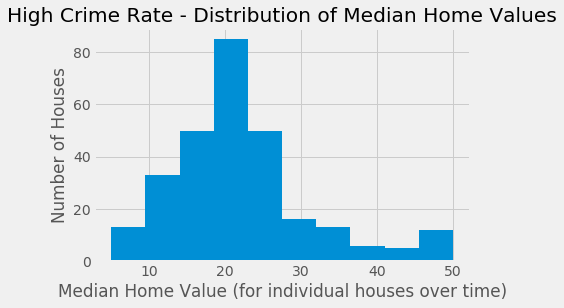

In [58]:
# Histogram plot for Charles River Median Values:
dfh_hcr['medv'].hist()
plt.title('High Crime Rate - Distribution of Median Home Values')
plt.xlabel('Median Home Value (for individual houses over time)')
plt.ylabel('Number of Houses')

As with the previous histograms, these showed a fairly normal distribution and and corresponded quite closely to their boxplots as expected. Now we look at a scatter plot between Number of Rooms and median values. We chose this variable for its high positive correlation with value in an effort to see any differences that occur between the data set of higher crime rate and that of the lower crime rate.

Text(0.5, 1.0, 'Home Median Values by Number of Rooms (High Crime)')

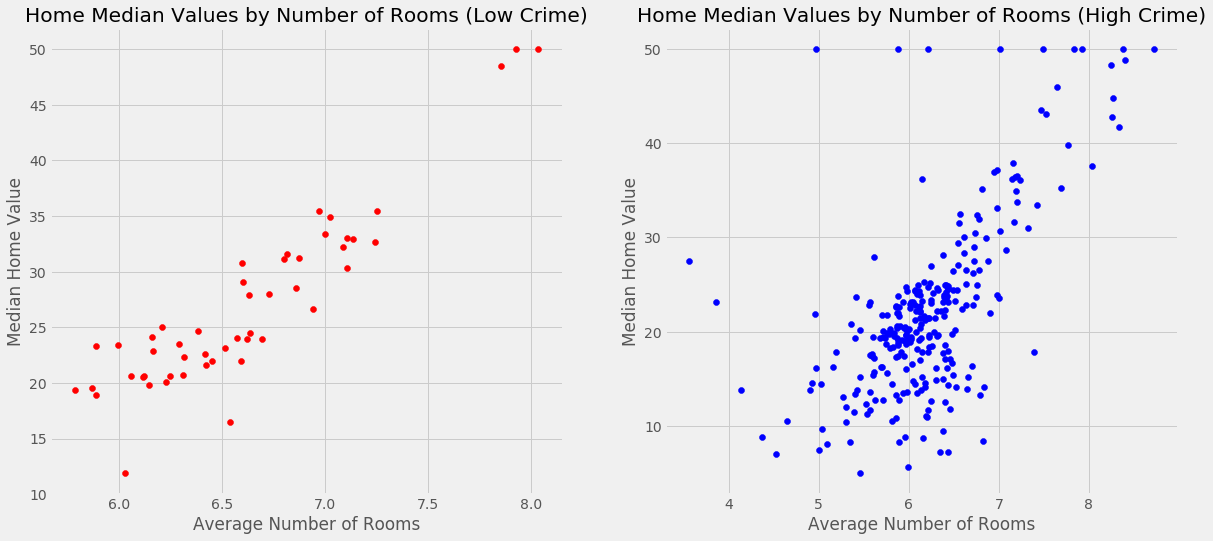

In [44]:
# Scatter plots for low/high crime rate:
# Scatter plosts for Charles River and Non-Charles River:
# Viz 1 for Charles River Comparison:
fig1 = plt.figure(figsize=(18,8)) #Setting Overall Plot
ax1 = fig1.add_subplot(121) # Setting subplot 1 
ax2 = fig1.add_subplot(122) # Setting subplot 2

# Drawing Scatter for number of rooms and median value under low crime rates
ax1.scatter(dfh_lcr['rm'], dfh_lcr['medv'], color='red', marker='o')
ax1.set_xlabel('Average Number of Rooms')
ax1.set_ylabel('Median Home Value')
ax1.set_title('Home Median Values by Number of Rooms (Low Crime)')

# Drawing Scatter for number of rooms and median value under high crime rates
ax2.scatter(dfh_hcr['rm'], dfh_hcr['medv'], color='blue', marker='o')
ax2.set_xlabel('Average Number of Rooms')
ax2.set_ylabel('Median Home Value')
ax2.set_title('Home Median Values by Number of Rooms (High Crime)')

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!